# Example of motor neuron pool with injected current at the dendrite

In [1]:
from soma_den_mn_model.pool import MNPool
from soma_den_mn_model.configs import S_MN_Config, FR_MN_Config, FF_MN_Config
from soma_den_mn_model.inputs import SynInputs
from dataclasses import asdict
import brian2.numpy_ as np
from brian2 import *

import os
os.environ['CC'] = 'gcc'
os.environ['CXX'] = 'g++'
prefs.codegen.target = 'cython'

In [2]:
# Initialise pool
mn_type = 's'
nneurons = 100
fs = 1e5 * Hz
duration  = 10 * second

# Get MN config
if mn_type == 's':
    config = S_MN_Config()
elif mn_type == 'fr':
    config = FR_MN_Config()
elif mn_type == 'ff':
    config = FF_MN_Config()

# Create pool
pool = MNPool(nneurons, fs, **asdict(config))

# Create inputs: injected current in the soma
syn_input = None
I_inj_soma = None
I_aux = np.concatenate([np.linspace(0, 10, int(duration/2 * fs)), np.linspace(10, 0, int(duration/2 * fs))])
I_inj_den = TimedArray(I_aux * nA, dt=1/fs)

# Run simulation
pool.run_sim(duration, syn_input, I_inj_soma, I_inj_den)

Simulation done!


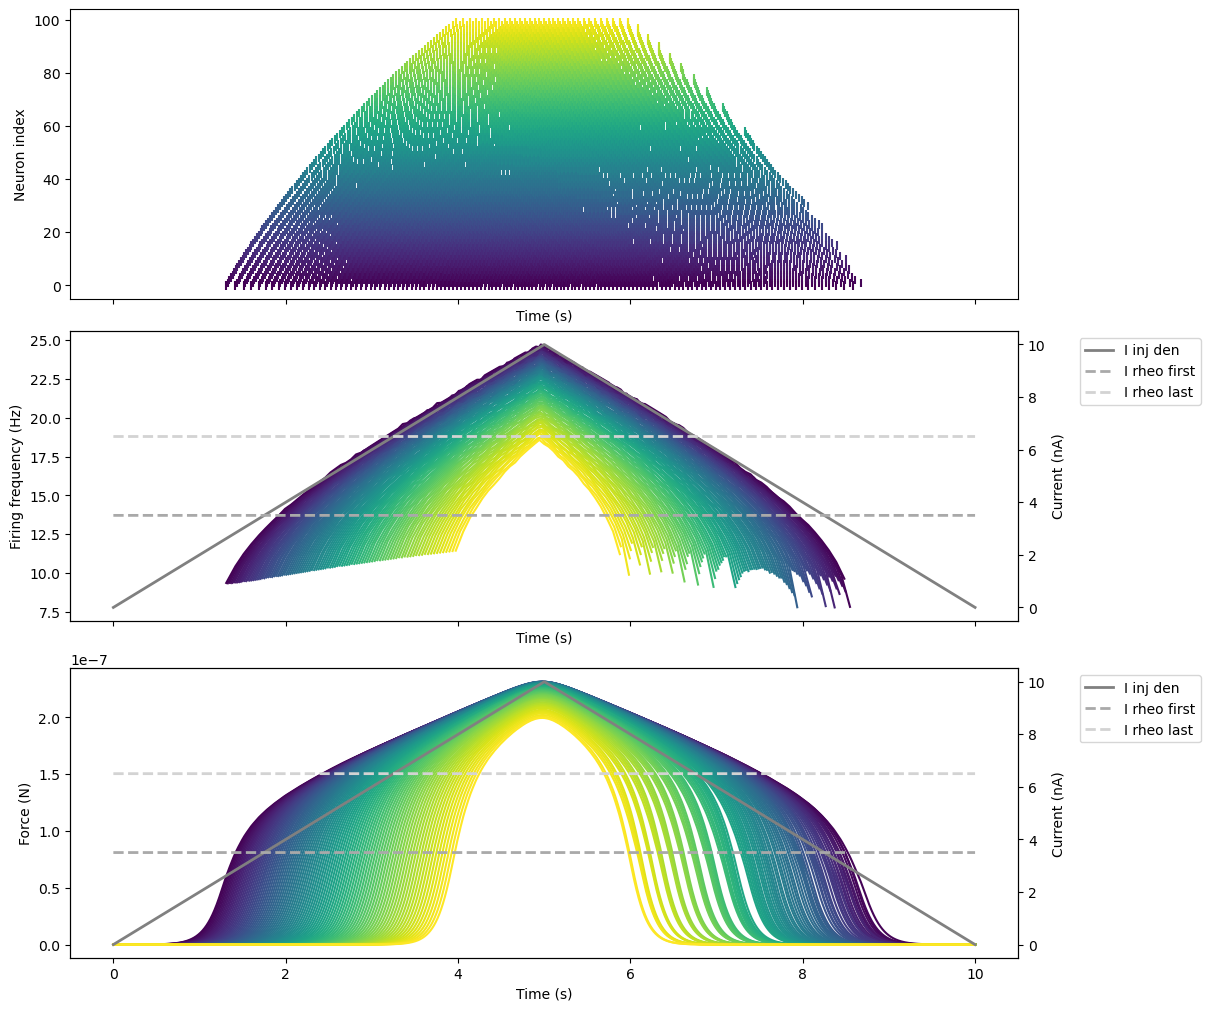

In [3]:
# Plot results
axs = pool.plot_results(I_inj_den(pool.state_mon.t), 'I inj den')
plt.show()

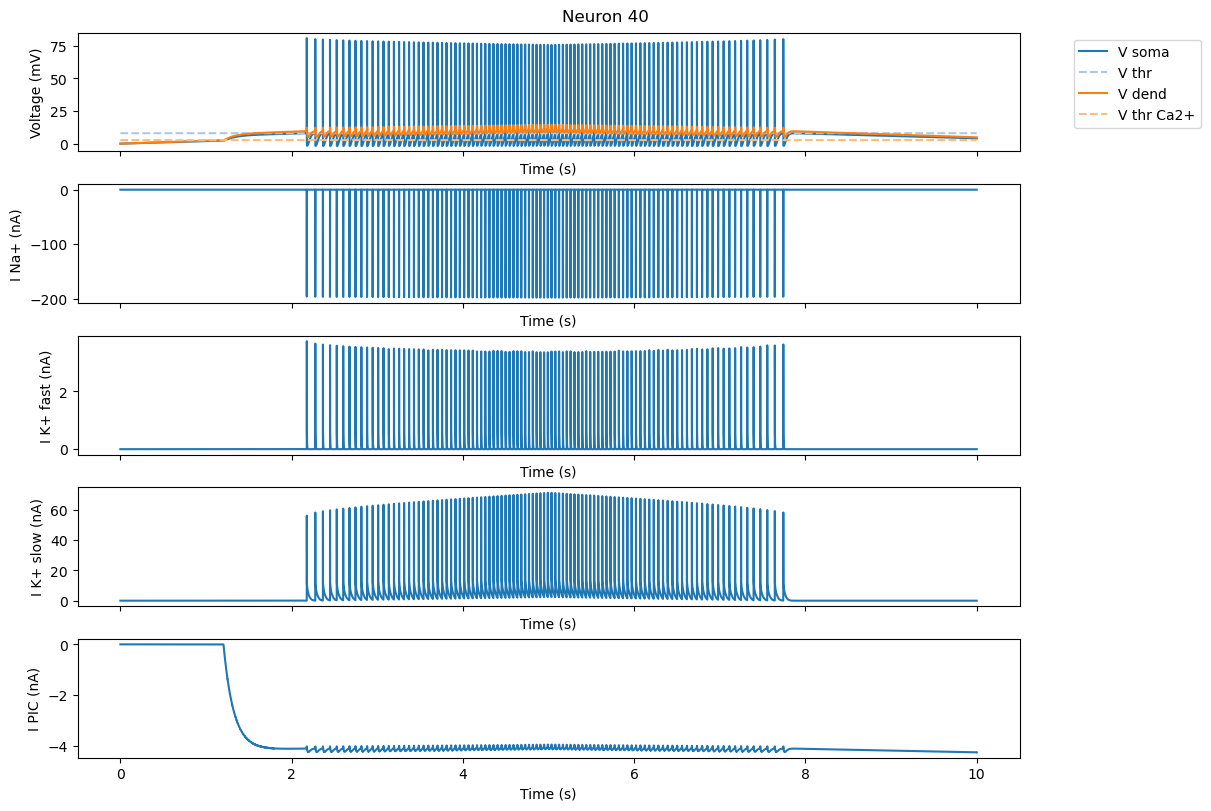

In [4]:
# Plot voltage and currents for a given neuron
neuron = 40

fig, axs = plt.subplots(5,1,figsize=(12,8), layout='constrained', sharex=True)
axs = np.ravel(axs)

axs[0].set_prop_cycle('color',[plt.cm.tab20(i) for i in np.linspace(0, 1, 20)])
axs[0].plot(pool.state_mon.t/second, pool.state_mon.v_soma[neuron]/mV, label='V soma')
axs[0].plot(pool.state_mon.t/second, np.ones(len(pool.state_mon.t_)) * pool.v_thr[neuron]/mV, '--', label='V thr')
axs[0].plot(pool.state_mon.t/second, pool.state_mon.v_den[neuron]/mV, label='V dend')
axs[0].plot(pool.state_mon.t/second, np.ones(len(pool.state_mon.t_)) * pool.v_thr_ca[neuron]/mV, '--', label='V thr Ca2+')
axs[0].set(xlabel='Time (s)', ylabel='Voltage (mV)')
axs[0].legend(loc='upper right', bbox_to_anchor=(1.2,1))

axs[1].plot(pool.state_mon.t/second, pool.state_mon.I_na[neuron]/nA)
axs[1].set(xlabel='Time (s)', ylabel='I Na+ (nA)')

axs[2].plot(pool.state_mon.t/second, pool.state_mon.I_kf[neuron]/nA)
axs[2].set(xlabel='Time (s)', ylabel='I K+ fast (nA)')

axs[3].plot(pool.state_mon.t/second, pool.state_mon.I_ks[neuron]/nA)
axs[3].set(xlabel='Time (s)', ylabel='I K+ slow (nA)')

axs[4].plot(pool.state_mon.t/second, pool.state_mon.I_pic[neuron]/nA)
axs[4].set(xlabel='Time (s)', ylabel='I PIC (nA)')

plt.suptitle(f'Neuron {neuron}')
plt.show()